In [1]:
%pip install torch torchvision torchaudio pandas matplotlib seaborn scikit-learn

import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset_path = 'data/raw/visuelle2'

# Check the files in the dataset folder
os.listdir(dataset_path)

['color_labels.pt',
 'fabric_labels.pt',
 '.DS_Store',
 'images',
 'stfore_test.csv',
 'vis2_gtrends_data.csv',
 'customer_data.csv',
 'category_labels.pt',
 'stfore_train.csv',
 'price_discount_series.csv',
 'vis2_weather_data.csv',
 'restocks.csv',
 'stfore_sales_norm_scalar.npy',
 'shop_weather_pairs.pt',
 'sales.csv']

#### Explore the .pt files

In [3]:
# Load the category_labels.pt file to check what it contains
category_labels = torch.load(os.path.join(dataset_path, 'category_labels.pt'))
# Convert dictionary keys to a list and slice the first 10 items
print(f"Category Labels: {list(category_labels.items())}")

Category Labels: [('culottes', 0), ('shorts', 1), ('drop sleeve', 2), ('long sleeve', 3), ('medium coat', 4), ('miniskirt', 6), ('sheath dress', 7), ('sleeveless', 8), ('short sleeves', 9), ('long dress', 10), ('doll dress', 11), ('trapeze dress', 12), ('short cardigan', 13), ('long coat', 14), ('shirt dress', 15), ('kimono dress', 17), ('medium cardigan', 18), ('maxi', 19), ('gitana skirt', 21), ('short coat', 22), ('long duster', 23), ('long cardigan', 25), ('long skirt', 26), ('cloak', 27), ('capris', 28), ('medium duster', 29), ('longuette skirt', 30), ('jumpsuit', 20), ('patterned top', 16), ('solid color top', 5), ('printed shirt', 24)]


In [4]:
# Load the color_labels.pt file
color_labels = torch.load(os.path.join(dataset_path, 'color_labels.pt'))
# Convert dictionary keys to a list and slice the first 10 items
print(f"Color Labels: {list(color_labels.items())}")

Color Labels: [('grey', 0), ('white', 1), ('black', 2), ('green', 3), ('brown', 4), ('red', 5), ('yellow', 6), ('blue', 7), ('violet', 8), ('orange', 9)]


In [5]:
# Load the fabric_labels.pt file
fabric_labels = torch.load(os.path.join(dataset_path, 'fabric_labels.pt'))
# Convert dictionary keys to a list and slice the first 10 items
print(f"Fabric Labels: {list(fabric_labels.items())}")

Fabric Labels: [('polyviscous', 0), ('satin cotton', 1), ('technical', 2), ('crepe', 3), ('cloth', 4), ('devore', 5), ('embossed', 6), ('acrylic', 7), ('georgette', 8), ('nice', 9), ('webbing', 10), ('marocain', 11), ('tulle', 12), ('velvet', 13), ('matte jersey', 14), ('frise', 15), ('scuba crepe', 16), ('silky satin', 17), ('dark jeans', 18), ('lurex', 19), ('cady', 20), ('fluid polyviscous', 21), ('shiny jersey', 22), ('cotton', 23), ('foam rubber', 24), ('muslin cotton or silk', 25), ('lace', 26), ('light jeans', 27), ('tencel', 28), ('viscose twill', 29), ('chambree', 30), ('mohair', 31), ('faux leather', 32), ('paillettes', 33), ('heavy jeans', 34), ('linen', 35), ('fur', 36), ('bengaline', 37), ('milano stitch', 38), ('jacquard', 39), ('dainetto', 40), ('macrame', 41), ('mutton', 42), ('plisse', 43), ('fluid', 44), ('ottoman', 45), ('ity', 46), ('plumetis', 47), ('angora', 48), ('hron', 49), ('chine crepe', 50), ('nylon', 51), ('chanel', 52), ('piquet', 53), ('plush', 54), ('tac

In [6]:
# Load the shop_weather_pairs.pt file
# contiene l’abbinamento tra ID retail (negozio) e locality (meteo),
shop_weather_pairs = torch.load(os.path.join(dataset_path, 'shop_weather_pairs.pt'))
# Convert dictionary items to a list and slice the first 10 items
print(f"Shop Weather Pairs: {list(shop_weather_pairs.items())}") 

Shop Weather Pairs: [(36, 78), (41, 71), (10, 8), (51, 113), (13, 86), (24, 107), (6, 217), (43, 47), (48, 193), (19, 29), (2, 84), (3, 68), (22, 103), (30, 223), (12, 110), (46, 181), (38, 182), (47, 181), (45, 21), (56, 18), (28, 194), (49, 212), (62, None), (0, 29), (18, 29), (26, 181), (61, 212), (20, 29), (1, 120), (9, 174), (16, 203), (37, 223), (59, 107), (8, 203), (57, 172), (40, 241), (63, 209), (4, 172), (35, 23), (54, 181), (39, 47), (32, 217), (5, 74), (65, 20), (64, 207), (14, 36), (42, 181), (60, 107), (31, 120), (66, 22), (52, 175), (21, 215), (55, None), (23, 238), (27, None), (58, None), (50, 223), (44, 172), (25, 215), (11, None), (7, 8), (29, 229), (33, 94), (15, 203), (17, None), (53, 159), (69, 172), (72, 223), (73, 56), (68, 203), (75, 29), (78, 190), (82, 132), (84, 22), (79, 70), (77, 10), (86, 213), (85, 178), (90, 184), (81, None), (99, 220), (80, 172), (100, 212), (93, 90), (83, 142), (101, 126), (76, 223), (102, 139), (95, None), (74, 242), (110, 24), (107, 

#### Explore the CSV files

In [7]:
# Load the customer_data.csv file
customer_data = pd.read_csv(os.path.join(dataset_path, 'customer_data.csv'))
customer_data


,customer,retail,external_code,data,qty
0,1,0,940,2017-06-10 12:41:57,1
1,1,0,718,2017-06-10 12:41:57,1
2,1,0,825,2017-06-10 12:54:11,1
3,2,1,471,2017-08-03 11:37:27,1
4,2,1,613,2017-08-03 11:37:27,1
...,...,...,...,...,...
3184157,667076,20,5356,2021-03-01 16:49:38,1
3184158,667077,20,5356,2021-03-04 19:36:50,1
3184159,667078,20,4630,2021-03-10 12:43:44,1
3184160,667082,12,4539,2021-04-27 16:02:16,1


In [8]:
customer_data.columns

Index(['customer', 'retail', 'external_code', 'data', 'qty'], dtype='object')

In [9]:
# Load the price_discount_series.csv file
price_discount_data = pd.read_csv(os.path.join(dataset_path, 'price_discount_series.csv'))
price_discount_data

,external_code,retail,0,1,2,3,4,5,6,7,8,9,10,11,price
0,5,36,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
1,2,51,0.5,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.054944
2,5,10,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
3,9,41,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.043951
4,5,13,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,5504,51,0.0,0.0,0.29,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.138405
106846,5558,10,0.0,0.0,0.00,0.00,0.00,0.29,0.29,0.52,0.60,0.60,0.60,0.60,0.138405
106847,4988,108,0.0,0.0,0.00,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.076843
106848,4280,105,0.0,0.0,0.00,0.00,0.40,0.10,0.40,0.40,0.40,0.40,0.40,0.40,0.043863


In [11]:
price_discount_data.columns

Index(['external_code', 'retail', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', 'price'],
      dtype='object')

In [12]:
# Load the restocks.csv file
restocks_data = pd.read_csv(os.path.join(dataset_path, 'restocks.csv'))
restocks_data

,external_code,retail,week,year,qty
0,3642,30,50,2018,5
1,3642,30,51,2018,6
2,3642,30,1,2019,2
3,3642,30,2,2019,3
4,3642,30,4,2019,4
...,...,...,...,...,...
949761,5073,64,2,2020,2
949762,5073,41,42,2019,7
949763,5073,41,45,2019,2
949764,5073,23,42,2019,5


In [13]:
restocks_data.columns

Index(['external_code', 'retail', 'week', 'year', 'qty'], dtype='object')

In [14]:
# Load the sales.csv file
sales_data = pd.read_csv(os.path.join(dataset_path, 'sales.csv'))
sales_data

,Unnamed: 0,external_code,retail,season,category,color,image_path,fabric,release_date,restock,...,2,3,4,5,6,7,8,9,10,11
0,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,...,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,32,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,26,...,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,106845,5504,51,AW19,medium coat,grey,AI19/05504.png,foam rubber,2019-12-30,12,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106846,106846,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
106847,106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,...,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0
106848,106848,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,...,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sales_data.columns

Index(['Unnamed: 0', 'external_code', 'retail', 'season', 'category', 'color',
       'image_path', 'fabric', 'release_date', 'restock', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype='object')

In [18]:

# Load the vis2_gtrends_data.csv file (Google Trends data)
gtrends_data = pd.read_csv(os.path.join(dataset_path, 'vis2_gtrends_data.csv'))
gtrends_data

,date,long sleeve,culottes,miniskirt,short sleeves,printed shirt,short cardigan,solid color top,trapeze dress,sleeveless,...,scottish,milano stitch,devore,hron,ottoman,fluid,flamed,fluid polyviscous,shiny jersey,goose
0,2015-10-05,55.0,41.0,66.0,58.0,58.0,22.0,24.0,43.0,66.0,...,57,0,29,17,57,80,49,-1.0,0,34
1,2015-10-12,55.0,44.0,73.0,71.0,61.0,31.0,37.0,21.2,63.0,...,54,0,17,14,61,80,41,-1.0,0,39
2,2015-10-19,60.0,42.0,73.0,62.0,61.0,43.0,37.0,27.4,47.0,...,55,0,21,23,63,79,52,-1.0,33,41
3,2015-10-26,57.0,44.0,68.0,51.0,55.0,19.0,37.0,59.8,54.0,...,55,0,26,14,58,76,33,-1.0,32,37
4,2015-11-02,49.0,39.0,66.0,39.0,63.0,16.0,37.0,44.0,51.0,...,55,0,18,18,60,80,37,-1.0,98,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2019-11-18,91.0,53.0,37.0,66.0,72.0,66.0,30.0,10.8,67.0,...,63,0,19,19,86,92,49,-1.0,27,60
216,2019-11-25,94.0,45.0,35.0,56.0,67.0,35.0,50.0,25.0,63.0,...,63,0,22,25,78,83,30,-1.0,80,61
217,2019-12-02,100.0,47.0,28.0,73.0,71.0,59.0,20.0,9.4,72.0,...,66,31,21,15,87,100,34,-1.0,0,61
218,2019-12-09,93.0,47.0,40.0,49.0,72.0,47.0,31.0,10.8,75.0,...,83,0,18,19,79,86,22,-1.0,27,59


In [19]:
gtrends_data.columns

Index(['date', 'long sleeve', 'culottes', 'miniskirt', 'short sleeves',
       'printed shirt', 'short cardigan', 'solid color top', 'trapeze dress',
       'sleeveless', 'long cardigan', 'sheath dress', 'short coat',
       'medium coat', 'doll dress', 'long dress', 'shorts', 'long coat',
       'jumpsuit', 'drop sleeve', 'patterned top', 'kimono dress',
       'medium cardigan', 'shirt dress', 'maxi', 'capris', 'gitana skirt',
       'long duster', 'yellow', 'brown', 'blue', 'grey', 'green', 'black',
       'red', 'white', 'orange', 'violet', 'acrylic', 'scuba crepe', 'tulle',
       'angora', 'faux leather', 'georgette', 'lurex', 'nice', 'crepe',
       'satin cotton', 'silky satin', 'fur', 'matte jersey', 'plisse',
       'velvet', 'lace', 'cotton', 'piquet', 'plush', 'bengaline', 'jacquard',
       'frise', 'technical', 'cady', 'dark jeans', 'light jeans', 'ity',
       'plumetis', 'polyviscous', 'dainetto', 'webbing', 'foam rubber',
       'chanel', 'marocain', 'macrame', 'emboss

In [20]:
# Load the vis2_weather_data.csv file (weather data)
weather_data = pd.read_csv(os.path.join(dataset_path, 'vis2_weather_data.csv'))
weather_data

,locality,date,avg temp °C,min temp °C,max temp °C,dew point °C,humidity %,visibility km,avg wind km/h,max wind km/h,gust km/h,slm pressure mb,avg pressure mb,rain mm
0,8,1/1/2016,6.0,2.0,11.0,2.0,69.0,10.0,9.0,13.0,0.0,1026.0,0.0,0.0
1,8,2/1/2016,9.0,2.0,14.0,5.0,69.0,10.0,11.0,17.0,0.0,1020.0,0.0,0.0
2,8,3/1/2016,12.0,8.0,15.0,10.0,86.0,9.0,12.0,22.0,52.0,1007.0,0.0,0.0
3,8,4/1/2016,11.0,6.0,14.0,8.0,85.0,9.0,10.0,17.0,0.0,1001.0,0.0,0.0
4,8,5/1/2016,13.0,10.0,16.0,11.0,86.0,9.0,10.0,19.0,0.0,1001.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89066,242,27/12/2019,13.0,9.0,17.0,8.0,70.0,21.0,10.0,18.0,0.0,1021.0,0.0,0.0
89067,242,28/12/2019,10.0,7.0,13.0,7.0,68.0,19.0,16.0,28.0,0.0,1021.0,0.0,0.0
89068,242,29/12/2019,9.0,8.0,11.0,1.0,51.0,21.0,23.0,35.0,0.0,1023.0,0.0,0.0
89069,242,30/12/2019,8.0,4.0,11.0,3.0,54.0,20.0,14.0,30.0,0.0,1023.0,0.0,0.0


In [21]:
weather_data.columns

Index(['locality', 'date', 'avg temp °C', 'min temp °C', 'max temp °C',
       'dew point °C', 'humidity %', 'visibility km', 'avg wind km/h',
       'max wind km/h', 'gust km/h', 'slm pressure mb', 'avg pressure mb',
       'rain mm'],
      dtype='object')

In [86]:
import pandas as pd

# Assicurati che la colonna 'date' sia datetime
weather_data['date'] = pd.to_datetime(weather_data['date'], dayfirst=True)

# Filtro desiderato
filtered = weather_data[
    (weather_data['date'] == pd.Timestamp('2016-01-04')) &
    (weather_data['locality'] == 8)
]

print(filtered)

   locality       date  avg temp °C  min temp °C  max temp °C  dew point °C  \
3         8 2016-01-04         11.0          6.0         14.0           8.0   

   humidity %  visibility km  avg wind km/h  max wind km/h  gust km/h  \
3        85.0            9.0           10.0           17.0        0.0   

   slm pressure mb  avg pressure mb  rain mm  
3           1001.0              0.0      0.0  


In [88]:
import pandas as pd

# Assicurati che 'date' sia datetime e specifica il formato europeo (giorno/mese/anno)
weather_data['date'] = pd.to_datetime(weather_data['date'], dayfirst=True)

# Seleziona il mese e anno desiderati
target_year = 2016
target_month = 1  # Dicembre

# Filtra le righe
filtered_df = weather_data[
    (weather_data['date'].dt.year == target_year) &
    (weather_data['date'].dt.month == target_month)
]
filtered_df.head(40)

,locality,date,avg temp °C,min temp °C,max temp °C,dew point °C,humidity %,visibility km,avg wind km/h,max wind km/h,gust km/h,slm pressure mb,avg pressure mb,rain mm
0,8,2016-01-01,6.0,2.0,11.0,2.0,69.0,10.0,9.0,13.0,0.0,1026.0,0.0,0.0
1,8,2016-01-02,9.0,2.0,14.0,5.0,69.0,10.0,11.0,17.0,0.0,1020.0,0.0,0.0
2,8,2016-01-03,12.0,8.0,15.0,10.0,86.0,9.0,12.0,22.0,52.0,1007.0,0.0,0.0
3,8,2016-01-04,11.0,6.0,14.0,8.0,85.0,9.0,10.0,17.0,0.0,1001.0,0.0,0.0
4,8,2016-01-05,13.0,10.0,16.0,11.0,86.0,9.0,10.0,19.0,0.0,1001.0,0.0,0.0
5,8,2016-01-06,13.0,8.0,16.0,10.0,83.0,10.0,10.0,28.0,41.0,999.0,0.0,0.0
6,8,2016-01-07,9.0,4.0,13.0,5.0,74.0,12.0,17.0,33.0,48.0,1004.0,0.0,0.0
7,8,2016-01-08,13.0,9.0,18.0,10.0,78.0,12.0,10.0,19.0,0.0,1010.0,0.0,0.0
8,8,2016-01-09,16.0,12.0,21.0,10.0,72.0,12.0,13.0,19.0,0.0,1011.0,0.0,0.0
9,8,2016-01-10,17.0,13.0,22.0,9.0,59.0,15.0,13.0,28.0,44.0,1009.0,0.0,0.0


#### Visualize some images to understand the data

In [42]:
image_folder = os.path.join(dataset_path, 'images/AI19')

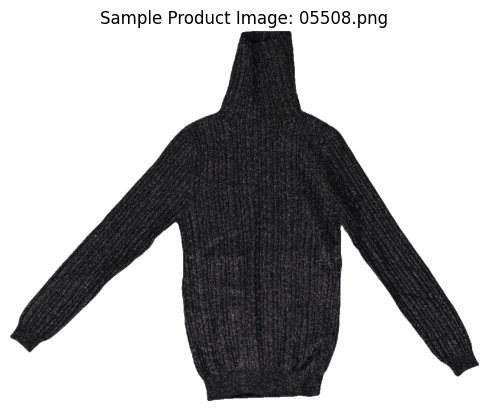

In [45]:
# Pick a random image from the folder to display
image_files = os.listdir(image_folder)
random_image_file = random.choice(image_files)
image_path = os.path.join(image_folder, random_image_file)
# Open and display the image
img = Image.open('./'+image_path)
plt.imshow(img)
plt.title(f"Sample Product Image: {random_image_file}")
plt.axis('off')
plt.show()

#### Analyze the data further (example for sales data)

In [59]:
# Check for missing values in the sales data
print("Sales Data Missing Values:\n")
sales_data.isnull().sum()

Sales Data Missing Values:



Unnamed: 0       0
external_code    0
retail           0
season           0
category         0
color            0
image_path       0
fabric           0
release_date     0
restock          0
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
dtype: int64

In [58]:
# Check the data types for the sales data
print("Sales Data Types:\n")
sales_data.dtypes

Sales Data Types:



Unnamed: 0         int64
external_code      int64
retail             int64
season            object
category          object
color             object
image_path        object
fabric            object
release_date      object
restock            int64
0                float64
1                float64
2                float64
3                float64
4                float64
5                float64
6                float64
7                float64
8                float64
9                float64
10               float64
11               float64
dtype: object

In [57]:
# Check the summary statistics for the sales data
print("Sales Data Summary Statistics:\n")
sales_data.describe()

Sales Data Summary Statistics:



,Unnamed: 0,external_code,retail,restock,0,1,2,3,4,5,6,7,8,9,10,11
count,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000,106850.000000
mean,53424.500000,3108.302134,41.349415,22.436022,1.825372,1.500440,1.448030,1.456359,1.423828,1.409911,1.343790,1.200468,1.050716,0.895133,0.763014,0.648779
std,30845.082469,1593.085572,28.040672,16.970656,1.252241,1.564483,1.577184,1.643756,1.680707,1.758441,1.779213,1.692647,1.611809,1.549376,1.540595,1.432452
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,-3.000000,-2.000000,0.000000
25%,26712.250000,1721.000000,18.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53424.500000,3173.000000,38.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,80136.750000,4592.750000,62.000000,26.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,106849.000000,5577.000000,125.000000,389.000000,25.000000,27.000000,27.000000,27.000000,43.000000,34.000000,49.000000,36.000000,50.000000,45.000000,53.000000,43.000000


#### Check relationships in the data (e.g., sales over time)

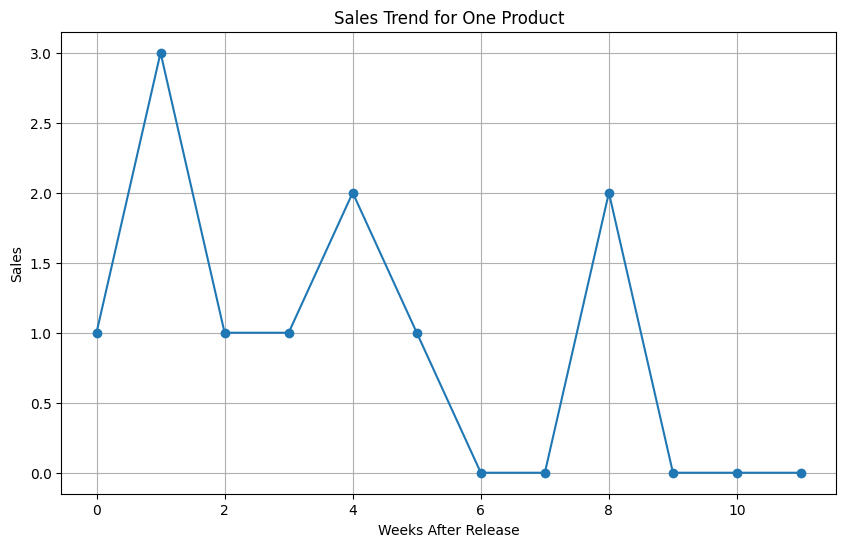

In [62]:
# Scegli un prodotto (prima riga per esempio)
product_sales = sales_data.loc[0, [str(i) for i in range(12)]].astype(float)

# Plotta vendite nel tempo (settimane 0-11)
plt.figure(figsize=(10, 6))
plt.plot(range(12), product_sales, marker='o')
plt.xlabel('Weeks After Release')
plt.ylabel('Sales')
plt.title('Sales Trend for One Product')
plt.grid(True)
plt.show()


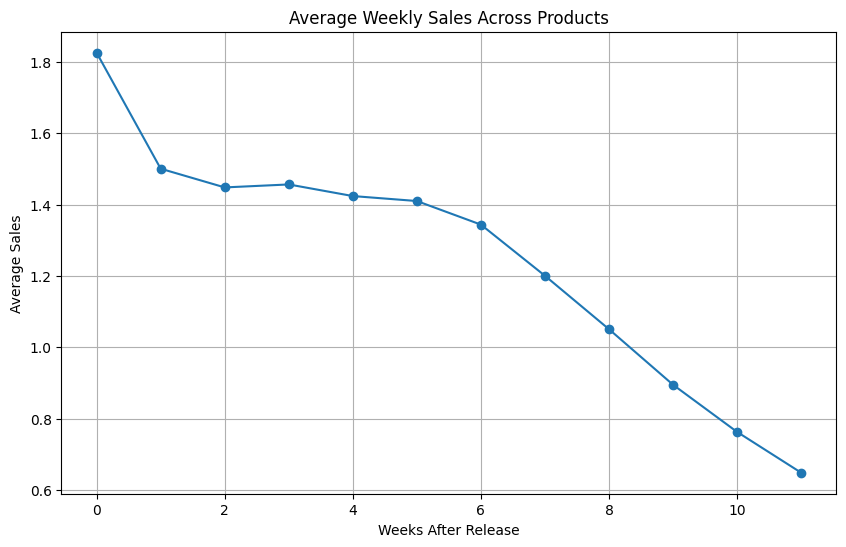

In [64]:
# media vendita settimanale per tutti i prodotti
weekly_sales = sales_data[[str(i) for i in range(12)]].astype(float).mean()

plt.figure(figsize=(10, 6))
plt.plot(range(12), weekly_sales, marker='o')
plt.xlabel('Weeks After Release')
plt.ylabel('Average Sales')
plt.title('Average Weekly Sales Across Products')
plt.grid(True)
plt.show()


In [67]:
# Uniamo sales_data con le immagini e metadati di prodotto 
df = sales_data.merge(price_discount_data, on=['external_code', 'retail'], how='left', suffixes=('', '_price'))
print(f"Shape merged sales-price data: {df.shape}")

# Verifica copertura immagini
img_paths = df['image_path'].notnull().mean()
print(f"Percentuale record con immagine: {img_paths:.2%}")

# Visualizza esempio unito (cat, col, fabric, etc...)
df[['category', 'color', 'fabric', 'image_path', 'season']].sample(5)

Shape merged sales-price data: (106850, 35)
Percentuale record con immagine: 100.00%


,category,color,fabric,image_path,season
76351,long sleeve,white,viscose twill,PE19/05218.png,SS19
26201,long sleeve,black,nice,AI17/01754.png,AW17
104184,kimono dress,brown,frise,AI19/05538.png,AW19
99706,long coat,black,crepe,AI19/05433.png,AW19
104767,long sleeve,grey,nice,AI19/05386.png,AW19


In [68]:
# Campagna = riga di sales_data (adatta se hai info migliori)
df['vendite_totali'] = df[[str(i) for i in range(12)]].sum(axis=1)
median_by_cat = df.groupby('category')['vendite_totali'].median()
df['mediana_categoria'] = df['category'].map(median_by_cat)
df['is_flop'] = df['vendite_totali'] < df['mediana_categoria']

print(f"Percentuale campagne flop: {(df['is_flop'].mean()*100):.1f}%")
df['is_flop'].value_counts()

Percentuale campagne flop: 46.9%


is_flop
False    56777
True     50073
Name: count, dtype: int64

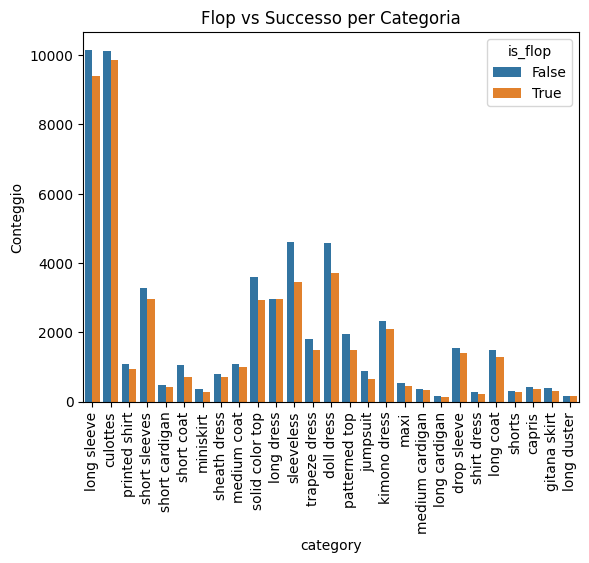

In [69]:
import seaborn as sns

# A. Distribuzione flop vs successo per categoria
sns.countplot(x='category', hue='is_flop', data=df)
plt.title("Flop vs Successo per Categoria")
plt.ylabel("Conteggio")
plt.xticks(rotation=90)
plt.show()

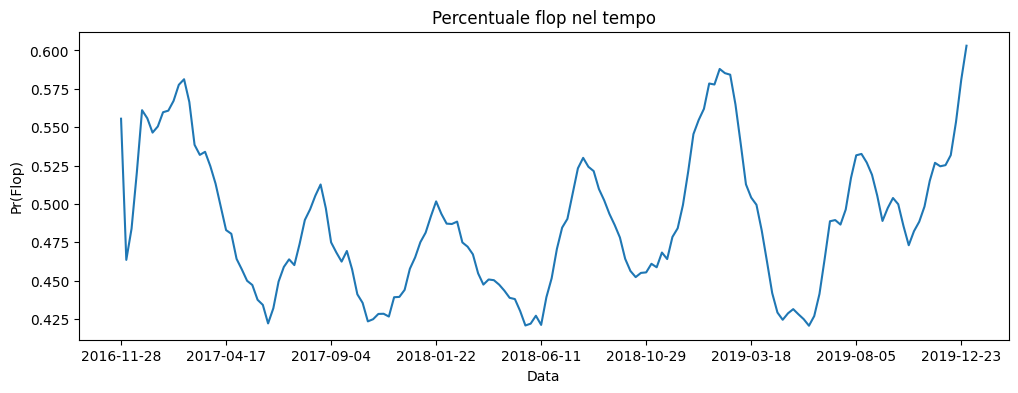

In [70]:
# Assumiamo che in 'release_date' ci sia la data di pubblicazione
flop_tempo = df.groupby('release_date')['is_flop'].mean()
flop_tempo = flop_tempo.rolling(10, min_periods=1).mean()
plt.figure(figsize=(12,4))
flop_tempo.plot()
plt.title("Percentuale flop nel tempo")
plt.ylabel("Pr(Flop)")
plt.xlabel("Data")
plt.show()

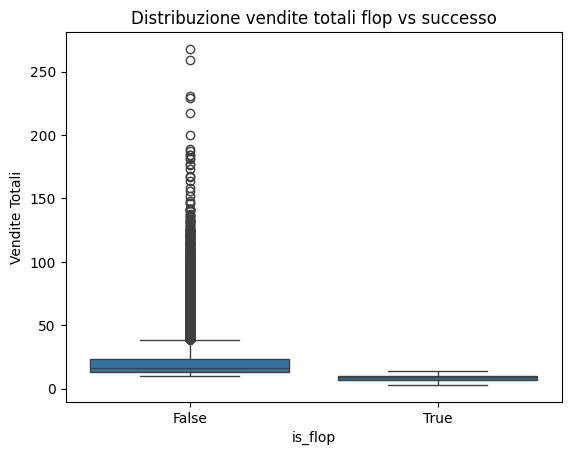

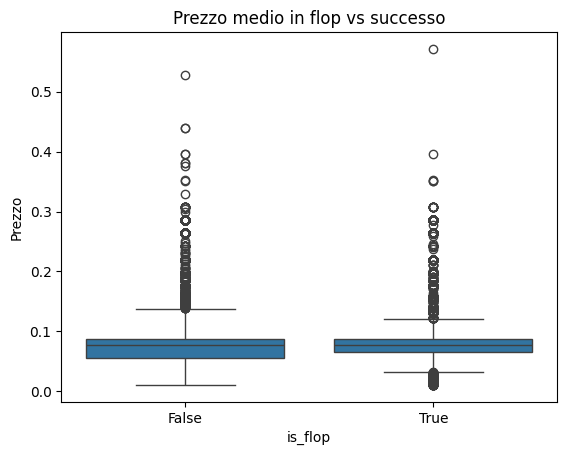

In [ ]:
sns.boxplot(x='is_flop', y='vendite_totali', data=df)
plt.title("Distribuzione vendite totali flop vs successo")
plt.ylabel("Vendite Totali")
plt.show()

sns.boxplot(x='is_flop', y='price', data=df)
plt.title("Prezzo medio in flop vs successo")
plt.ylabel("Prezzo")
plt.show()

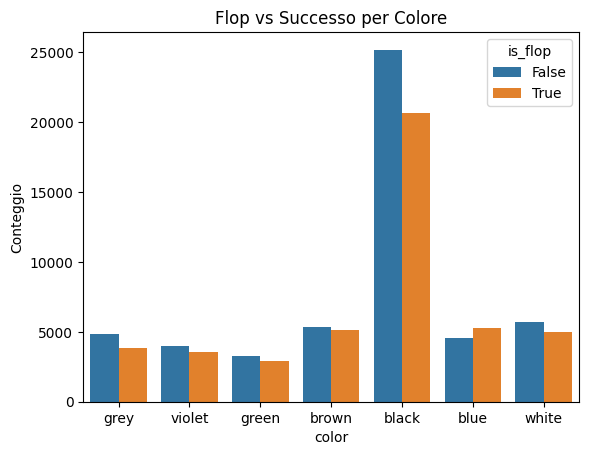

In [ ]:
top_colors = df['color'].value_counts().index[:7]
sns.countplot(x='color', hue='is_flop', data=df[df['color'].isin(top_colors)])
plt.title("Flop vs Successo per Colore")
plt.ylabel("Conteggio")
plt.show()

Note: you may need to restart the kernel to use updated packages.


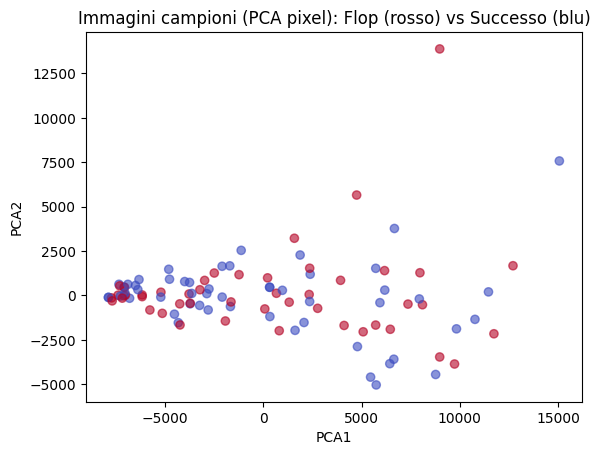

In [ ]:
# PCA per immagini
from sklearn.decomposition import PCA
import numpy as np

n_sample = 100 # procedi su sottoinsieme!
sample = df.sample(n_sample, random_state=1)
imgs = []
lbls = []
for ix,row in sample.iterrows():
    try:
        im = Image.open(os.path.join('./'+dataset_path+'/images', row['image_path']))
        im = im.resize((64,64)).convert('RGB')
        imgs.append(np.array(im).flatten())
        lbls.append(row['is_flop'])
    except Exception as e:
        print(f"Errore caricando l'immagine {row['image_path']}: {e}")
if len(imgs) == 0:
    raise ValueError("Nessuna immagine caricata. Controlla il percorso delle immagini.")
X = np.stack(imgs)
pca = PCA(2)
X_2d = pca.fit_transform(X)

plt.scatter(X_2d[:,0], X_2d[:,1], c=lbls, cmap='coolwarm', alpha=0.6)
plt.title("Immagini campioni (PCA pixel): Flop (rosso) vs Successo (blu)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

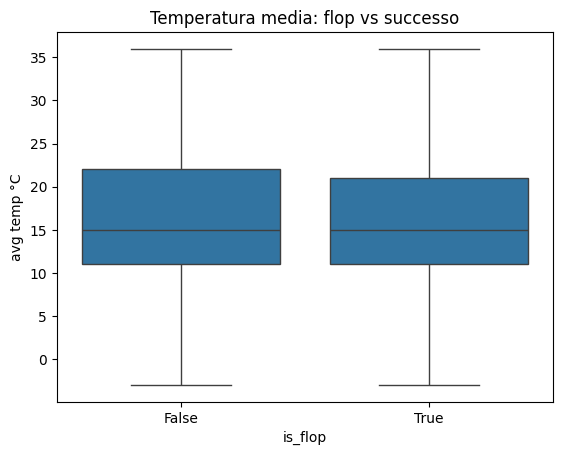

In [90]:
# Esempio: join per data tra flop e meteo
df_meteo = weather_data.rename({'date':'release_date'}, axis=1)
df_meteo['release_date'] = pd.to_datetime(df_meteo['release_date'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.merge(df_meteo[['release_date','avg temp °C','rain mm']], on='release_date', how='left')
sns.boxplot(x='is_flop', y='avg temp °C', data=df)
plt.title("Temperatura media: flop vs successo")
plt.show()

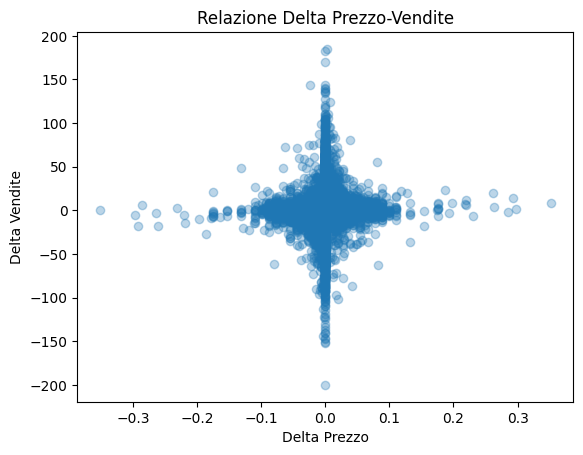

In [91]:
# Esempio differenza prezzo/vendite settimana t vs t-1
df['delta_price'] = df['price'] - df.groupby('external_code')['price'].shift(1)
df['delta_vendite'] = df['vendite_totali'] - df.groupby('external_code')['vendite_totali'].shift(1)
plt.scatter(df['delta_price'], df['delta_vendite'], alpha=0.3)
plt.xlabel("Delta Prezzo")
plt.ylabel("Delta Vendite")
plt.title("Relazione Delta Prezzo-Vendite")
plt.show()

In [94]:
merged

,Unnamed: 0,external_code,retail,season,category,color,image_path,fabric,release_date,restock,...,6,7,8,9,10,11,week,year,qty,sell_through
0,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,...,0.0,0.0,2.0,0.0,0.0,0.0,48.0,2016.0,6.0,1.0
1,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,...,0.0,0.0,2.0,0.0,0.0,0.0,50.0,2016.0,14.0,1.0
2,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2017.0,2.0,1.0
3,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,...,0.0,0.0,0.0,1.0,1.0,0.0,48.0,2016.0,6.0,1.0
4,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,...,0.0,0.0,0.0,1.0,1.0,0.0,51.0,2016.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412799,106846,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,...,0.0,2.0,1.0,0.0,0.0,0.0,49.0,2019.0,12.0,1.0
412800,106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,...,5.0,2.0,0.0,0.0,0.0,0.0,41.0,2019.0,13.0,1.0
412801,106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,...,5.0,2.0,0.0,0.0,0.0,0.0,6.0,2021.0,2.0,1.0
412802,106848,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,...,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2020.0,1.0,1.0


## 📊 Summary of the Dataset and Performed Analyses

### **Description of the Multimodal Dataset**

This project integrates **multimodal data** supporting the analysis and forecasting of marketing campaign performance for fashion/retail products.  
The main **data sources** include:

- **Tabular product/sales data**:  
  - **sales_data**: for each (product, `external_code`) and store (`retail`) combination, includes product information (category, color, fabric, season, image, release date, etc.), restock records, and sales week by week.
  - **price_discount_data**: prices and discounts practiced per product/store/week.
  - **restocks_data**: history of inventory replenishments for each product in each store and period (how much was actually made available for sale).
- **Temporal/time-series data**:  
  - **weather_data**: daily/weekly weather information for geographic areas (temperature, rain, wind, etc.), matched to stores via `shop_weather_pairs.pt`.
  - **gtrends_data**: time-varying popularity (Google Trends) of categories/products, used as a proxy for market demand and customer interest.
- **Visual data**:  
  - **Product images**: structured in folders by season, each file represents an item available in a given store/time.
- **Metadata/labels**:  
  - `.pt` files associate human-readable names of categories, colors, and fabrics to numerical IDs; these are used for normalization, aggregation, and feature engineering.

The dataset enables the enrichment of each sales record with visual features (images), environmental context (weather), market demand proxy (Google Trends), and logistics (restock), thus providing a solid foundation for **multimodal machine learning models**.

---

### **Exploratory Analyses Performed**

**Initial data and structure exploration:**  
- Inspection of all CSV tables and `.pt` files to understand the semantics of every field (product, store, color, time, weather, Google Trends, images, etc.).
- Check of join keys (`external_code`, `retail`), information coverage (e.g., % of records with images, matched weather data, % with restock info, etc.).
- Identification of main categorical variables and their encodings (labels).

**Data quality & consistency:**  
- Analysis of missing values and outliers in main columns (sales, price, promotions, weather, trends, images, etc.).
- Cross-table consistency checks (e.g., products/campaigns without sales, zero restock, missing or duplicate images).
- Temporal field formatting and conversion to time series.

**Business and descriptive analysis:**  
- **Temporal trends:** sales trends (overall and by product/category/color/fabric) and restocks, identification of seasonality and sales peaks.
- **Campaign flop/success assessment:**  
  - Data-driven definition of “flop” as sales below the category/product median.
  - Flop/success distribution globally, by category, by store, by week.
  - Relationship analysis between flop/success and promotions, price, weather, Google Trends.
- **Outlier and correlation analysis:**  
  - Boxplots and scatterplots between sales and features (price, promotion, restock, Google popularity, weather conditions).
  - Correlation between flop status and lack of stock, price/outliers, or adverse weather conditions.

**Image analysis:**  
- Visual exploration of product images to assess data quality and initial clustering tests to find visual patterns common to flop/success campaigns.
- Initial PCA/tSNE experiments on samples to investigate visual similarity among flops.

**Multimodal coverage and consistency analysis:**  
- Check of data coverage across all modalities (images, weather, trends, logistics).
- Analysis of records missing one or more sources/features to assess robustness for future multimodal ML pipelines.

---

### **Rationale for Modeling/Guidance**

All these analyses made it possible to:
- Identify critical relationships (and potential confounders) between stock, promotions, trends, environmental conditions, and marketing outcomes.
- Reconstruct **the full context of flop/successful campaigns**: assessing if a flop is due to timing error (vs Trend/Google), lack of supply, weather, communication, or product/visual fit.
- Define a rich and coherent data pipeline for future ML model training able to **suggest concrete actions** to improve the performance of failed campaigns, separating exogenous causes (market, weather, trends) from endogenous ones (marketing, visual/product characteristics).

---

**In summary:**  
The multimodal dataset is wide, integrated, clean and ready for developing predictive and decision support systems that can learn not only “what didn’t work” but also “**why**” – and suggest **data-driven corrective actions** related to content, strategies, offers, logistics, and timing of future marketing campaigns.